# Introduction

Welcome to the extra module of Text summarization for EHR documents.In this section, you'll be getting familiar with Electronic Health Records, and work on a simple and preliminary demo of organizing these records into a summary.

## How to Run the Module

Throughout this module you will encounter both text and code cells. Please run each cell in this Notebook by clicking "Run" button in the Toolbar or by pushing Shift+Enter keys
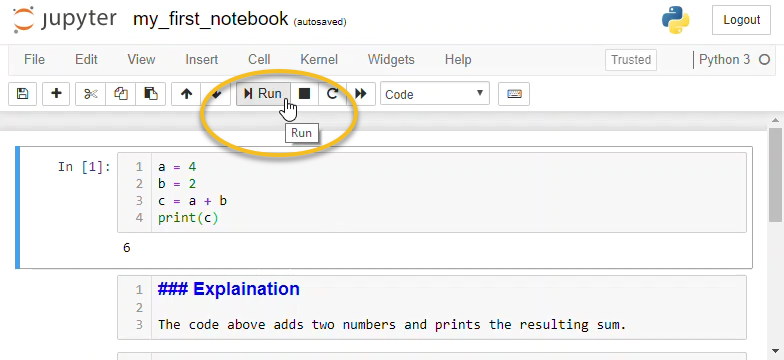

In [ ]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')

# Databases for Electronic Health Records

## Synthea

[Synthea](https://synthetichealth.github.io/synthea/)<sup>TM</sup> is a synthetic patient generator that models the medical history of synthetic patients. It’s Generic Module Framework (GMF) enables the modeling of various diseases and conditions that contribute to the medical history of synthetic patients. Each patient is simulated independently from birth to present day. Their diseases, conditions and medical care are defined by one or more generic modules.Each module models events that could occur in a real patient’s life, describing a progression of states and the transitions between them. These modules are informed by clinicians and real-world statistics collected by the CDC, NIH, and other research sources.

There are problems with the real-world records. First problem – accessibility and privacy issue as a common knowledge. Also, the real notes and records are usually not structured and sometimes not complete, which brings trouble to experiments. We finally need to get there but first of all let’s start from taking a baby step using synthesized records generated by Synthea.

Synthea started with modules for the top ten reasons patients visit their primary care physician and the top ten conditions that result in years of life lost. In our demo, 1000 patients of breast cancer were generated and tested. Other modules include food allergies, Lung Cancer, Alzheimer’s Disease, etc. The generated dataset is provided in this module. But if you are interested in working with Synthea by yourself, feel free refer to [Synthea wiki](https://github.com/synthetichealth/synthea/wiki). The process is very simple. You can download the files from their github site and generate the synthesized records using command line code. There are also parameters could be specified.


### Dataset Structure

The datasets are in csv format with content shown in the following picture.
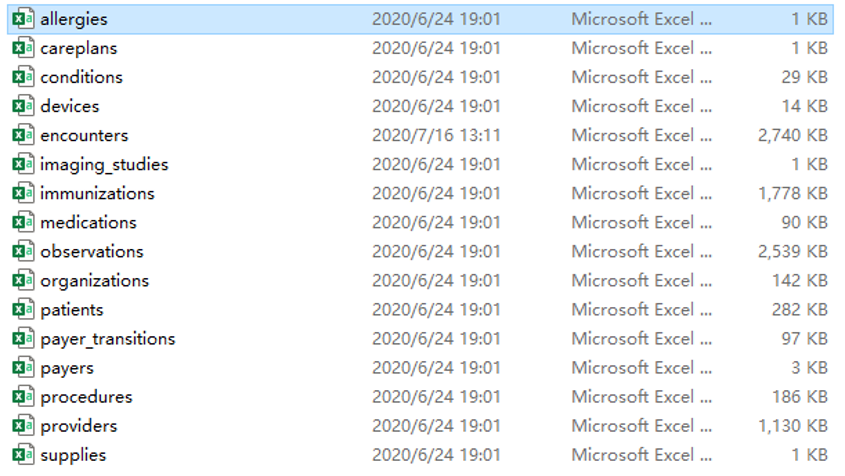

Taken dataset "procedures" as an example, as shown in the following picture, you can see patient ID, which specifies the patient that the procedure was conducted on, date of the procedure, description of the procedure, reason of procedure, and so on. Similarly, the demographic data correlated to each patient id can be found in the "patients" table. 
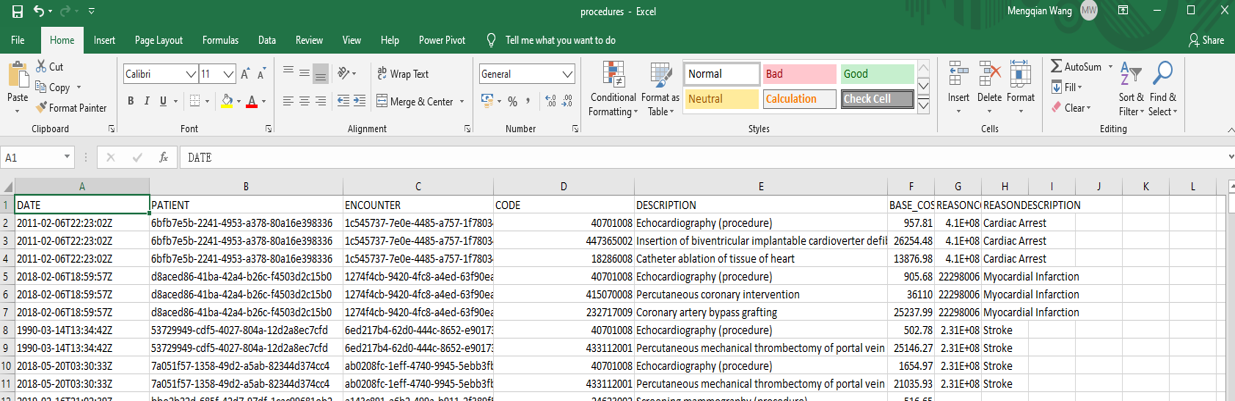

## MIMIC-III

[MIMIC-III](https://mimic.physionet.org/) (Medical Information Mart for Intensive Care III) is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012.

The database includes information such as demographics, vital sign measurements made at the bedside (~1 data point per hour), laboratory test results, procedures, medications, caregiver notes, imaging reports, and mortality (both in and out of hospital).

MIMIC-III is freely available to public, but needs the users submit a request before getting the access. In this module, we'll use one of the discharge summary from MIMIC-III as an example, and build a structure for the summaries that fit in our scenario.

### Example Summary

Admission Date:  \[**2118-6-2**\]       Discharge Date:  \[**2118-6-14**\]

Date of Birth:                    Sex:  F

Service:  MICU and then to \[**Doctor Last Name **\] Medicine

HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female
with a history of emphysema (not on home O2), who presents
with three days of shortness of breath thought by her primary
care doctor to be a COPD flare......

PAST MEDICAL HISTORY:
1. COPD.  Last pulmonary function tests in \[**2117-11-3**\]
demonstrated a FVC of 52% of predicted, a FEV1 of 54% of
predicted, a MMF of 23% of predicted, and a FEV1:FVC ratio of
67% of predicted, that does not improve with bronchodilator
treatment.  The FVC, however, does significantly improve with
bronchodilator treatment consistent with her known reversible
air flow obstruction in addition to an underlying restrictive
ventilatory defect.  The patient has never been on home
oxygen prior to this recent episode.  She has never been on
steroid taper or been intubated in the past.
2. Lacunar CVA.  MRI of the head in \[**2114-11-4**\]
demonstrates ......

MEDICATIONS ON ADMISSION:
1. Hydrochlorothiazide 25 q.d.
2. Prednisone 60 mg, 50 mg, 40 mg, 20 mg.
3. Levofloxacin 500 mg q.d.
4. Imdur 60 mg q.d.
5. Synthroid 75 mcg q.d.
6. Pulmicort nebulizer b.i.d.
7. Albuterol nebulizer q.4. prn.
8. Lexapro 10 mg q.d.
9. Protonix 40 mg q.d.
10. Aspirin 81 mg q.d.

ALLERGIES:  Norvasc leads to lightheadedness and headache.

FAMILY HISTORY:  Noncontributory.

SOCIAL HISTORY:  Lives with her husband, Dr. \[**Known lastname 1809**\] an
eminent Pediatric Neurologist at \[**Hospital3 1810**\].  The
patient is a prior smoker, but has not smoked in over 10
years.  She has no known alcohol use and she is a full code.

PHYSICAL EXAM AT TIME OF ADMISSION:  Blood pressure 142/76,
heart rate 100 and regular, respirations at 17-21, and 97%
axillary temperature.......  

LABORATORY STUDIES:  White count 19, hematocrit 41, platelets
300.  Chem-7:  127, 3.6, 88, 29, 17, 0.6, 143.  Troponin was
negative.  CKs were negative times three.  Initial blood gas
showed a pH of 7.4, pO2 of 66, pCO2 of 54......

Due to the space limitation, the summary was truncated. The sections that are included in this summary are as followed:
- Admission Date
- Discharge Date
- Date of Birth
- Sex/Gender
- Service
- History of Present Illness
- Medical History
- Medication on Admission
- Allergies
- Family and Social History
- Physical Exam at Time of Admission
- Laboratory studies
- Discharge Condition/ Status/ Medication
- Follow-up Plans
- Final Diagnosis!



We want to be clear about out target users and usage scenario. Who will be using this technique? Well, for now, I’ll say we are targeting the doctors that are in appointments with their patients. Especially in the current circumstance of this pandemic, imagine you are a doctor and is having a remote meeting with your patient. On your screen, beside the online chatting window, you have a little summary section which helps you generate an overall idea of your patient’s situation.

We remove the admission date and discharge date since there isn’t any in our scenario. Instead, I added the current time as for the time of appointment. On the other hand, we added the name of the patient for the convenience of the doctor. The real discharge summary has the name of patient but MIMIC-III removed the name for the sake of confidentiality. Service, medication on admission, physical exams, discharge conditions, and final diagnosis were also removed since they don’t fit in our scenario. The rest, like family history, follow-up plans, laboratory studies were not included since they were not provided in Synthea. The sections that are added, like history for conditions, medications, procedures, and devices, can together contribute to the section of medical history and history of present illness. We also include immunizations which were provided by synthea, and as a supplementary which is also necessary for physicians. 

The final sections that are included in our summary is as followed:
- Current Time
- Date of Birth
- Sex/Gender
- First/ Last Name
- Conditions
- Medication History
- Allergies
- Procedure History
- Device History
- Immunizations


# How to generate the summary

## Loading the data as dataframe

In [ ]:
#loading packages that will be used in this module
import pandas as pd
import time
from datetime import datetime

#setting the directory where the data is stored
data_path = 'Data/Synthea/'

#loading necessary data
patients_path = data_path + 'patients.csv'
patients_df = pd.read_csv(patients_path)

observations_path = data_path + 'observations.csv'
observations_df = pd.read_csv(observations_path)

allergies_path = data_path + 'allergies.csv'
allergies_df = pd.read_csv(allergies_path)

conditions_path = data_path + 'conditions.csv'
conditions_df = pd.read_csv(conditions_path)

medication_path = data_path + 'medications.csv'
medication_df = pd.read_csv(medication_path)

procedures_path = data_path + 'procedures.csv'
procedures_df = pd.read_csv(procedures_path)

devices_path = data_path + 'devices.csv'
devices_df = pd.read_csv(devices_path)

immunizations_path = data_path + 'immunizations.csv'
immunizations_df = pd.read_csv(immunizations_path)

print('All data loaded!')

Let's take a look at the patients table.

In [ ]:
patients_df

The "patient id", which is indicated by "Id" in the "patients" table, is used as an unique identifier in all of the other tables. That is to say, if you want to generate a summary of health records for the lady named "Tereasa291 Harvey63", you'll need to use her patient id which is "fb208deb-5fee-425f-be0b-6b0db9eea5c6". Let'define a function that can help us find the patient id using patient's name.

In [ ]:
def find_id(first_name, last_name):
    for index, row in patients_df.iterrows():
        if row['FIRST'] == first_name and row['LAST'] == last_name:
            return (row['Id'])

Let's find the id for Ms. Tereasa291 Harvey63.

In [ ]:
patient_id = find_id('Tereasa291', 'Harvey63')
print(patient_id)

## Generating the Summary Section-wise

Now, let's define the sections that we want to include in our summary.

In [ ]:
CurrentTime = "Current Time: "
Sex = 'Sex: '
FirstName = 'First Name: '
LastName = 'Last Name: '
DOB = 'Date of Birth: '
Observations = 'Observations: \n'
MedicineHistory = 'Medical History: \n'
Allergies = 'Allergies: '
Conditions = 'Conditions: \n'
Medication = 'Medication History: \n'
Procedures = 'Procedures History: \n'
Devices = 'Devices History: \n'
Immunizations = 'Immunizations: \n'

### Current Time

Let's complete these sections one by one. First of all, the current time which can serve as the appointment time.

In [ ]:
ts = time.localtime()
current_time = time.strftime("%Y-%m-%d %H:%M:%S", ts)
CurrentTime += current_time
CurrentTime += '\n'

print(CurrentTime)

### Demographic Data

Secondly, demographic data.

In [ ]:
sex = list(patients_df['GENDER'].loc[patients_df['Id']==patient_id])
Sex += sex[0]
Sex += '\n'
first_name = list(patients_df['FIRST'].loc[patients_df['Id']==patient_id])
FirstName += first_name[0]
FirstName += '\n'
last_name = list(patients_df['LAST'].loc[patients_df['Id']==patient_id])
LastName += last_name[0]
LastName += '\n'
dob = list(patients_df['BIRTHDATE'].loc[patients_df['Id']==patient_id])
DOB += dob[0]
DOB += '\n'

print(Sex)
print(FirstName)
print(LastName)
print(DOB)

### Observations

This section we'll be working on the observations. let's take a look at the observation table first.

In [ ]:
observations_df

The most useful columns in this section are DESCRIPTION, VALUE, and UNITS. Some commonly seen observations include QALY, DALY, and QOLS, which represent "Quality Adjusted Life Year", "Disability Adjusted Life Year", and "Quality of Life Scale". We ignore the QOLS in our model since the scale of scoring is slightly different from the universal one to avoid confusin. Another observation that we get rid of is the "causation of death" since a person who passed away won't have an appointment with a doctor. 

Generally, what we are doing is to extrat these information for the current patient and organize them into human readable sentences.

In [ ]:
#Observations
all_observations = []
date_stamp_q = ''
date_stamp_d = ''
for observation_ind in range(len(observations_df)):
    if observations_df['PATIENT'].loc[observation_ind] == patient_id \
        and observations_df['CODE'].loc[observation_ind] \
        not in ['Cause of Death [US Standard Certificate of Death]', 'QOLS']:
            date_ = observations_df['DATE'].loc[observation_ind]
            if observations_df['CODE'].loc[observation_ind] == 'QALY':
                if date_stamp_q != '':
                    date_stamp_q_ = datetime.strptime(date_[:-1], '%Y-%m-%dT%H:%M:%S')
                    if date_stamp_q_ > date_stamp_q:
                        date_stamp_q = date_stamp_q_
                else:
                    date_stamp_q = datetime.strptime(date_[:-1], '%Y-%m-%dT%H:%M:%S')
            if observations_df['CODE'].loc[observation_ind] == 'DALY':
                if date_stamp_d != '':
                    date_stamp_d_ = datetime.strptime(date_[:-1], '%Y-%m-%dT%H:%M:%S')
                    if date_stamp_d_ > date_stamp_d:
                        date_stamp_d = date_stamp_d_
                else:
                    date_stamp_d = datetime.strptime(date_[:-1], '%Y-%m-%dT%H:%M:%S')
                
            description_ = observations_df['DESCRIPTION'].loc[observation_ind]
            value_ = observations_df['VALUE'].loc[observation_ind]
            unit_ = observations_df['UNITS'].loc[observation_ind]
            all_observations.append({'date': date_, 'description': description_,\
                                     'value': value_, 'units': unit_})
ind = 0
for i in range(len(all_observations)):
    if all_observations[i]['description'] == 'QALY':
        if datetime.strptime(all_observations[i]['date'][:-1], '%Y-%m-%dT%H:%M:%S') == date_stamp_q:
            Observations = Observations + '(' + str(ind+1) + ') '
            date_q = all_observations[i]['date'].split('T')[0]
            Observations = Observations + "Quality Adjusted Life Year as of " + date_q + ' is ' + \
                all_observations[i]['value'] + ' (units: year);\n'
            ind += 1
    elif all_observations[i]['description'] == 'DALY':
        if datetime.strptime(all_observations[i]['date'][:-1], '%Y-%m-%dT%H:%M:%S') == date_stamp_d:
            Observations = Observations + '(' + str(ind+1) + ') '
            date_d = all_observations[i]['date'].split('T')[0]
            Observations = Observations + "Disability Adjusted Life Year as of " + date_d + ' is ' + \
                all_observations[i]['value'] + ' (units: year);\n'
            
            ind += 1
    else:
        if type(all_observations[i]['units']) != str or all_observations[i]['units'] == 'null' or all_observations[i]['units'] == '':
            Observations = Observations + all_observations[i]['description']+ ': ' + \
            all_observations[i]['value'] + ';\n'
            ind += 1
        else:
            Observations = Observations + all_observations[i]['description']+ ': ' + \
            all_observations[i]['value'] + ' (units: ' + all_observations[i]['units'] + ');\n'
            ind += 1

print(Observations)

### Medication

In the section of medications, we include the information of each medication that the patient has taken, the periods during when the patient was taking it, and the reason of taking this medication. 

In [ ]:
medication_df

Again, we want to keep our language succinct by orgnizing related/similar information together. It happens that the synthesized patient doesn't have any medication history. In that case the output will be blank.

In [ ]:
 #medication
all_medication = {}

for medication_ind in range(len(medication_df)):
    if medication_df['PATIENT'].loc[medication_ind] == patient_id:
        start_date_ = medication_df['START'].loc[medication_ind]
        stop_date_ = medication_df['STOP'].loc[medication_ind]
        description_ = medication_df['DESCRIPTION'].loc[medication_ind]
        reason_ = medication_df['REASONDESCRIPTION'].loc[medication_ind]
        if description_ in all_medication.keys():
            all_medication[description_].append({'start': start_date_, 'stop':stop_date_, 
                                                 'reason': reason_})
        else:
            all_medication[description_] = [{'start': start_date_, 'stop':stop_date_, 
                                             'reason': reason_}]
i = 0
for medication in all_medication:
    Medication = Medication + '(' + str(i+1) + ') ' + medication + ' was given '
    reason_sorting = {}
    for period in all_medication[medication]:
        if period['reason'] not in reason_sorting.keys():
            reason_sorting[period['reason']] = {'all_time_pts':[], 'all_periods': []}    
        if period['start'] == period['stop'] or type(period['stop']) != str:
            reason_sorting[period['reason']]['all_time_pts'].append(period['start'])
        else:
            sent = 'from ' + period['start'] + ' to ' + period['stop']
            reason_sorting[period['reason']]['all_periods'].append(sent)
    
    for reason in reason_sorting:
        all_periods = []
        all_time_pts = []
        all_periods = reason_sorting[reason]['all_periods']
        all_time_pts = reason_sorting[reason]['all_time_pts']
        if all_periods == []:
            for i in range(len(all_time_pts)):
                time_pt = all_time_pts[i]
                if i == 0:
                    Medication = Medication + ' at ' + time_pt
                elif i == len(all_time_pts) - 1:
                    Medication = Medication + ', and at ' + time_pt
                else:
                    Medication = Medication + ', at ' + time_pt
        else:
            if all_time_pts != []:
                for i in range(len(all_time_pts)):
                    time_pt = all_time_pts[i]
                    if i == 0:
                        Medication = Medication + ' at ' + time_pt
                    else:
                        Medication = Medication + ', at ' + time_pt
                for i in range(len(all_periods)):
                    period_sent = all_periods[i]
                    if i == len(all_periods) - 1:
                        Medication = Medication + ', and ' + period_sent
                    else:
                        Medication = Medication + ', ' + period_sent
            else:
                for i in range(len(all_periods)):
                    period_sent = all_periods[i]
                    if i == 0:
                        Medication = Medication + period_sent
                    elif i == len(all_periods) - 1:
                        Medication = Medication + ', and ' + period_sent
                    else:
                        Medication = Medication + ', ' + period_sent
        if type(reason) != str:
            Medication = Medication + ';\n'
        else:
            if reason != '':
                Medication = Medication + ' as a treatment of ' + reason + ';\n'
            else:
                Medication = Medication + ';\n'
    i += 1    
    
print(Medication)

### Procedures

The table for procedures:

In [ ]:
procedures_df

The following code generates the summary for procedures.

In [ ]:
#procedure
all_procedures = {}

for procedure_ind in range(len(procedures_df)):
    if procedures_df['PATIENT'].loc[procedure_ind] == patient_id:
        date_ = procedures_df['DATE'].loc[procedure_ind]
        description_ = procedures_df['DESCRIPTION'].loc[procedure_ind]
        reason_ = procedures_df['REASONDESCRIPTION'].loc[procedure_ind]
        if type(reason_) != str or reason_ == '':
            reason_ = 'not specified'  
        if reason_ in all_procedures.keys():
            all_procedures[reason_].append({'date': date_, 
                                                 'description': description_})
        else:
            all_procedures[reason_] = [{'date': date_,
                                             'description': description_}]
i = 0
for reason in all_procedures:
    procedure_sorting = {}
    for procedure in all_procedures[reason]:
        if procedure['description'] not in procedure_sorting.keys():
            procedure_sorting[procedure['description']] = []    
        procedure_sorting[procedure['description']].append(procedure)
    
    k = 0
    for procedure in procedure_sorting:
        all_periods_ = procedure_sorting[procedure]
        for i in range(len(all_periods_)):
            period_pro = all_periods_[i]
            if k == 0:
                if i == 0:
                    Procedures = Procedures + procedure + ' was conducted at ' + period_pro['date']
                elif i == len(all_periods) - 1:
                    Procedures = Procedures + ', and ' + period_pro['date']
                else:
                    Procedures = Procedures + ', ' + period_pro['date']
            elif k == len(procedure_sorting)-1:
                if i == 0:
                    Procedures = Procedures + ', and ' + procedure + ' was conducted at ' + period_pro['date']
                elif i == len(all_periods) - 1:
                    Procedures = Procedures + ', and ' + period_pro['date']
                else:
                    Procedures = Procedures + ', ' + period_pro['date']
            else:
                if i == 0:
                    Procedures = Procedures + ', ' + procedure + ' was conducted at ' + period_pro['date']
                elif i == len(all_periods) - 1:
                    Procedures = Procedures + ', and ' + period_pro['date']
                else:
                    Procedures = Procedures + ', ' + period_pro['date']      
        k += 1
        
    if reason != 'not specified':
        if len(procedure_sorting) > 1:
            Procedures = Procedures + ' as treatments of ' + reason + ';\n'
        else:
            Procedures = Procedures + ' as a treatment of ' + reason + ';\n'
    else:
        Procedures = Procedures + ';\n'
    i += 1

print(Procedures)

### Devices

Table for devices:

In [ ]:
devices_df

Code for generating summary for devices:

In [ ]:
 #devices
all_devices = {}

for device_ind in range(len(devices_df)):
    if devices_df['PATIENT'].loc[device_ind] == patient_id:
        start_date_ = devices_df['START'].loc[device_ind]
        stop_date_ = devices_df['STOP'].loc[device_ind]
        description_ = devices_df['DESCRIPTION'].loc[device_ind]
        if description_ in all_devices.keys():
            all_devices[description_].append({'start': start_date_, 'stop': stop_date_})
        else:
            all_devices[description_] = [{'start': start_date_, 'stop': stop_date_}]
i = 0
for device in all_devices:
    if len(all_devices[device]) > 1:
        Devices = 'There are ' + str(len(all_devices[device])) + ' periods for device ' + device + ': '
        for j in range(len(all_devices[device])):
            start_date_ = all_devices[device][j]['start']
            stop_date_ = all_devices[device][j]['stop']
            period_sent = start_date_ + ' - ' + stop_date_
            Devices = Devices + '(' + str(j+1) + ') ' + period_sent + '; '
    else:
        Devices = Devices + '(' + str(i+1) + ') ' + device + ' was started '
        Devices = Devices + 'at ' + all_devices[device][0]['start']
        if type(all_devices[device][0]['stop']) == str and all_devices[device][0]['stop'] != '':
            Devices = Devices + ' and stoped at ' + all_devices[device][0]['stop'] + ';'
        else:
            Devices += ';'
    Devices +=  '\n'
    i += 1
    
print(Devices)

### Immunizations

Table for immunizations:

In [ ]:
immunizations_df

Code for generating summary of immunizations:

In [ ]:
# immunization
all_immunizations = {}
for immu_ind in range(len(immunizations_df)):
    if immunizations_df['PATIENT'].loc[immu_ind] == patient_id:
        date_withTime = immunizations_df['DATE'].loc[immu_ind]
        date_withTime_list = date_withTime.split('T')
        date_ = date_withTime_list[0]
        description_ = immunizations_df['DESCRIPTION'].loc[immu_ind]
        if description_ in all_immunizations.keys():
            all_immunizations[description_].append(date_)
        else:
            all_immunizations[description_] =[date_]
i = 0
for immunization in all_immunizations:
    Immunizations = Immunizations + '(' + str(i+1) + ') The patient was immunized with '
    for j in range(len(all_immunizations[immunization])):
        if j == 0:
            Immunizations = Immunizations + immunization + ' on ' + all_immunizations[immunization][j]
        elif j == len(all_immunizations[immunization])-1:
            Immunizations = Immunizations + ', and ' + all_immunizations[immunization][j]
        else:
            Immunizations = Immunizations + ', ' + all_immunizations[immunization][j]
    Immunizations += '; \n'
    i += 1
    
print(Immunizations)

### Allergies

Need to note that these 1000 patients generated using breast cancer module don't contain allergies info. The code is still provided as a reference. 

Table for allergies:

In [ ]:
allergies_df

Code for generating summaries of allergies:

In [ ]:
#Allergies
all_allergies = []
for allergy_ind in range(len(allergies_df)):
    if allergies_df['PATIENT'].loc[allergy_ind] == patient_id:
        all_allergies.append(allergies_df['DESCRIPTION'].loc[allergy_ind])
if all_allergies != []:
    for allergy in all_allergies:
        Allergies += allergy
        Allergies += '; '
else:
    Allergies += 'Unknown'
Allergies += '\n'

print(Allergies)

### Conditions

Table for conditions

In [ ]:
conditions_df

Code for generating summaries of conditions:

In [ ]:
#Conditions
all_conditions = []
for condition_ind in range(len(conditions_df)):
    if conditions_df['PATIENT'].loc[condition_ind] == patient_id:
        description_ = conditions_df['DESCRIPTION'].loc[condition_ind]
        start_date_ = conditions_df['START'].loc[condition_ind]
        stop_date_ = conditions_df['STOP'].loc[condition_ind]
        all_conditions.append({'start': start_date_, 'stop': stop_date_, 'description': description_})
for i in range(len(all_conditions)):
    if type(all_conditions[i]['stop']) == str and all_conditions[i]['stop'] != '':
        sent = '(' + str(i+1) + ') ' + all_conditions[i]['description'] + ' started from ' + \
            all_conditions[i]['start'] + ' and stoped at ' + all_conditions[i]['stop'] + '; \n'
    else:
        sent = '(' + str(i+1) + ') ' + all_conditions[i]['description'] + ' started from ' + \
            all_conditions[i]['start'] + '; \n'
    Conditions = Conditions + sent   

print(Conditions)

### Integration

Finally, put them all together.

In [ ]:
output =   \
CurrentTime + '\n' +\
Sex +'\n' +\
FirstName +'\n' +\
LastName + '\n' +\
DOB +'\n' +\
Observations +'\n' +\
Allergies +'\n' +\
Conditions +'\n' +\
Medication +'\n' +\
Procedures +'\n' +\
Devices +'\n' +\
Immunizations    

print(output)

This module shows a very simple demo of organizing information into sentences and generating a summary. However, the true cases of text summarization could be much more complicated. For example, the information needs to be extrated from natural languages instead of structured tables. Also, due to space limitation, we have to discard some information and keep only the most important portion in most of the time. 